# **Lab 12: Clustering (30 points)**

#### **Dylan Watson**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

## Necessary packages

In [1]:
#system('sudo apt-get update', intern = TRUE)
#system('sudo apt-get install r-cran-factoextra', intern = TRUE)
#library(factoextra)

In [2]:
# Install packages (may take 5 minutes)
install.packages("GGally")
install.packages("factoextra")

Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\Rtmpghoq99\downloaded_packages


Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\Rtmpghoq99\downloaded_packages


In [3]:
# load libraries
library(ggplot2)
library(GGally)
library(factoextra)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



<br>


---



####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font> (4 points)

In this lab, we will be working with data on arrests in the United States. The dataset `USArrests` is already built into R. More information can be found by running the command `?USArrests`

1. Store the dataset `USArrests` as the dataframe `dat`
2. Plot pairwise plots by running the command `ggpairs(dat)`. This is a command within the GGally library.
3. Interpret the pairs plots. Which variables are correlated? Which variables are not correlated? Explain in complete sentences.

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


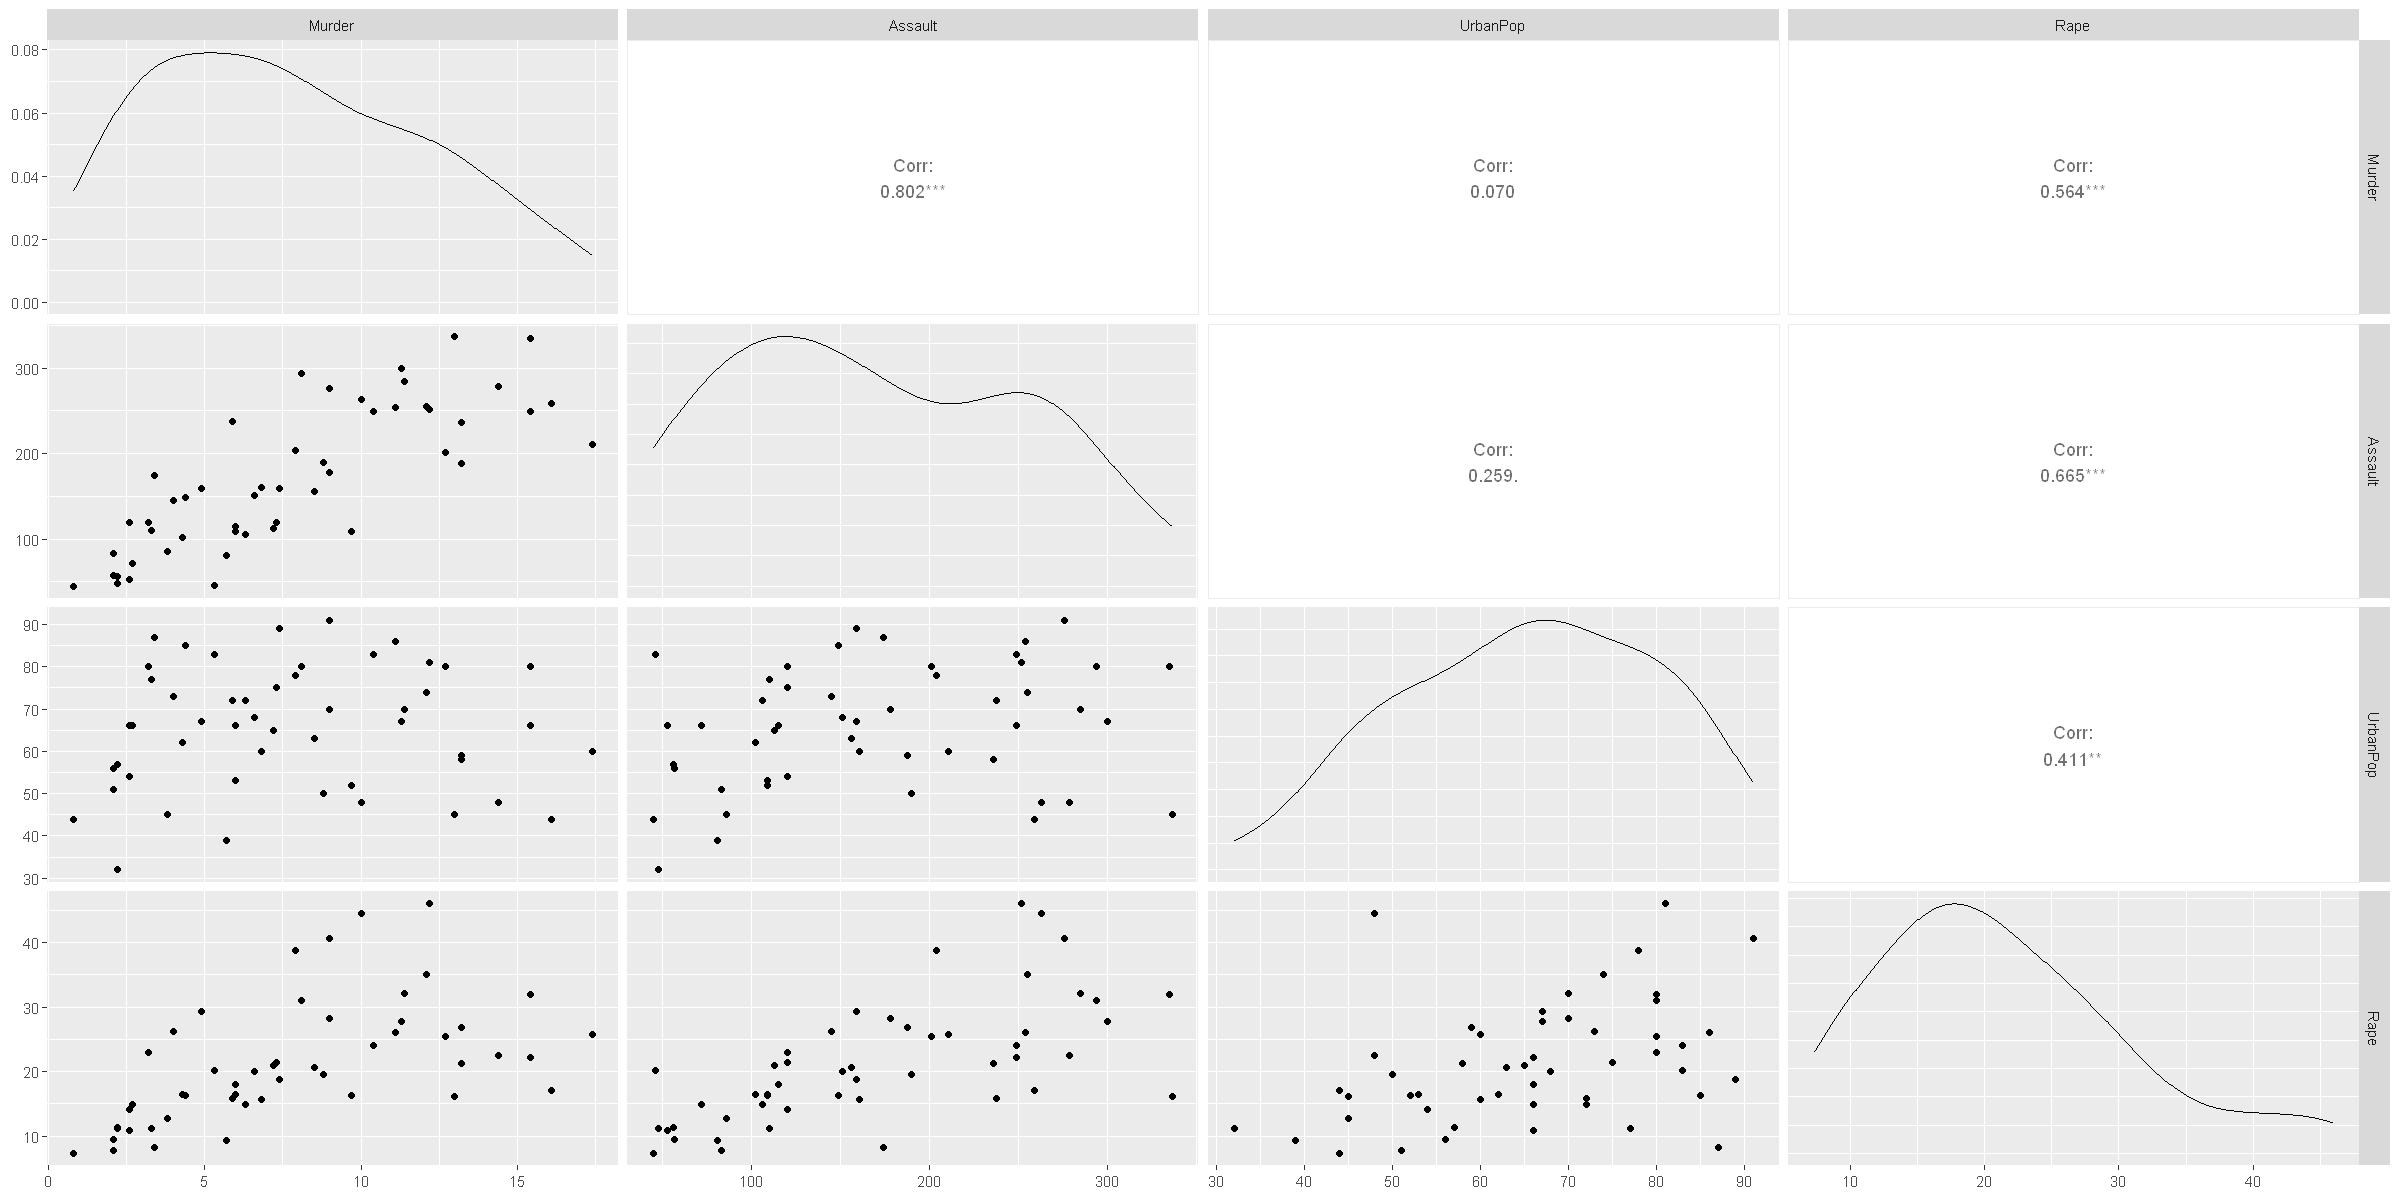

In [4]:
# run the following code for more information on the dataset
# ?USArrests
options(repr.plot.width=20, repr.plot.height=10)

# 1.)
data("USArrests")
dat = as.data.frame(USArrests)
summary(dat)
head(dat)

# 2.)
ggpairs(dat)

# 3.)
# The vars with the strongest correlation in order are Assault vs Murder, Rape vs UrbanPop, and Rape vs Murder with R^2 values of 0.802, 0.665, and 0.564 respectively.
# The vars with the weakest correlations in order are UrbanPop vs Murder, and UrbanPop vs Assault with R^2 values of 0.070 and 0.259 respectively.

<br>

---

<br>






####<font color=red>Task 1</font>  (8 points)

1. Scale the `dat` dataframe using `scale()` and store as the matrix `mat`

2. Use the `kmeans()` function to cluster the rows of `mat` into K = 2 clusters. Store the clustering as `clustk`. Use the option `nstart = 25`.

3. Print the cluster means for each cluster (`clustk$centers`). What is the interpretation of each cluster? Explain in complete sentences.

4. Run the following command to visualize the clustering.
`fviz_cluster(clustk, data = mat)`. Based on the cluster means from Task 1.3, how would you interpret the clustering? Does this make sense?

Note: the `fviz_cluster()` function plots on axes defined by principal components, which we will not cover in this course. However, you may use this plot to visually identify states within the same clusters.





,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


     Murder    Assault   UrbanPop       Rape
1  1.004934  1.0138274  0.1975853  0.8469650
2 -0.669956 -0.6758849 -0.1317235 -0.5646433


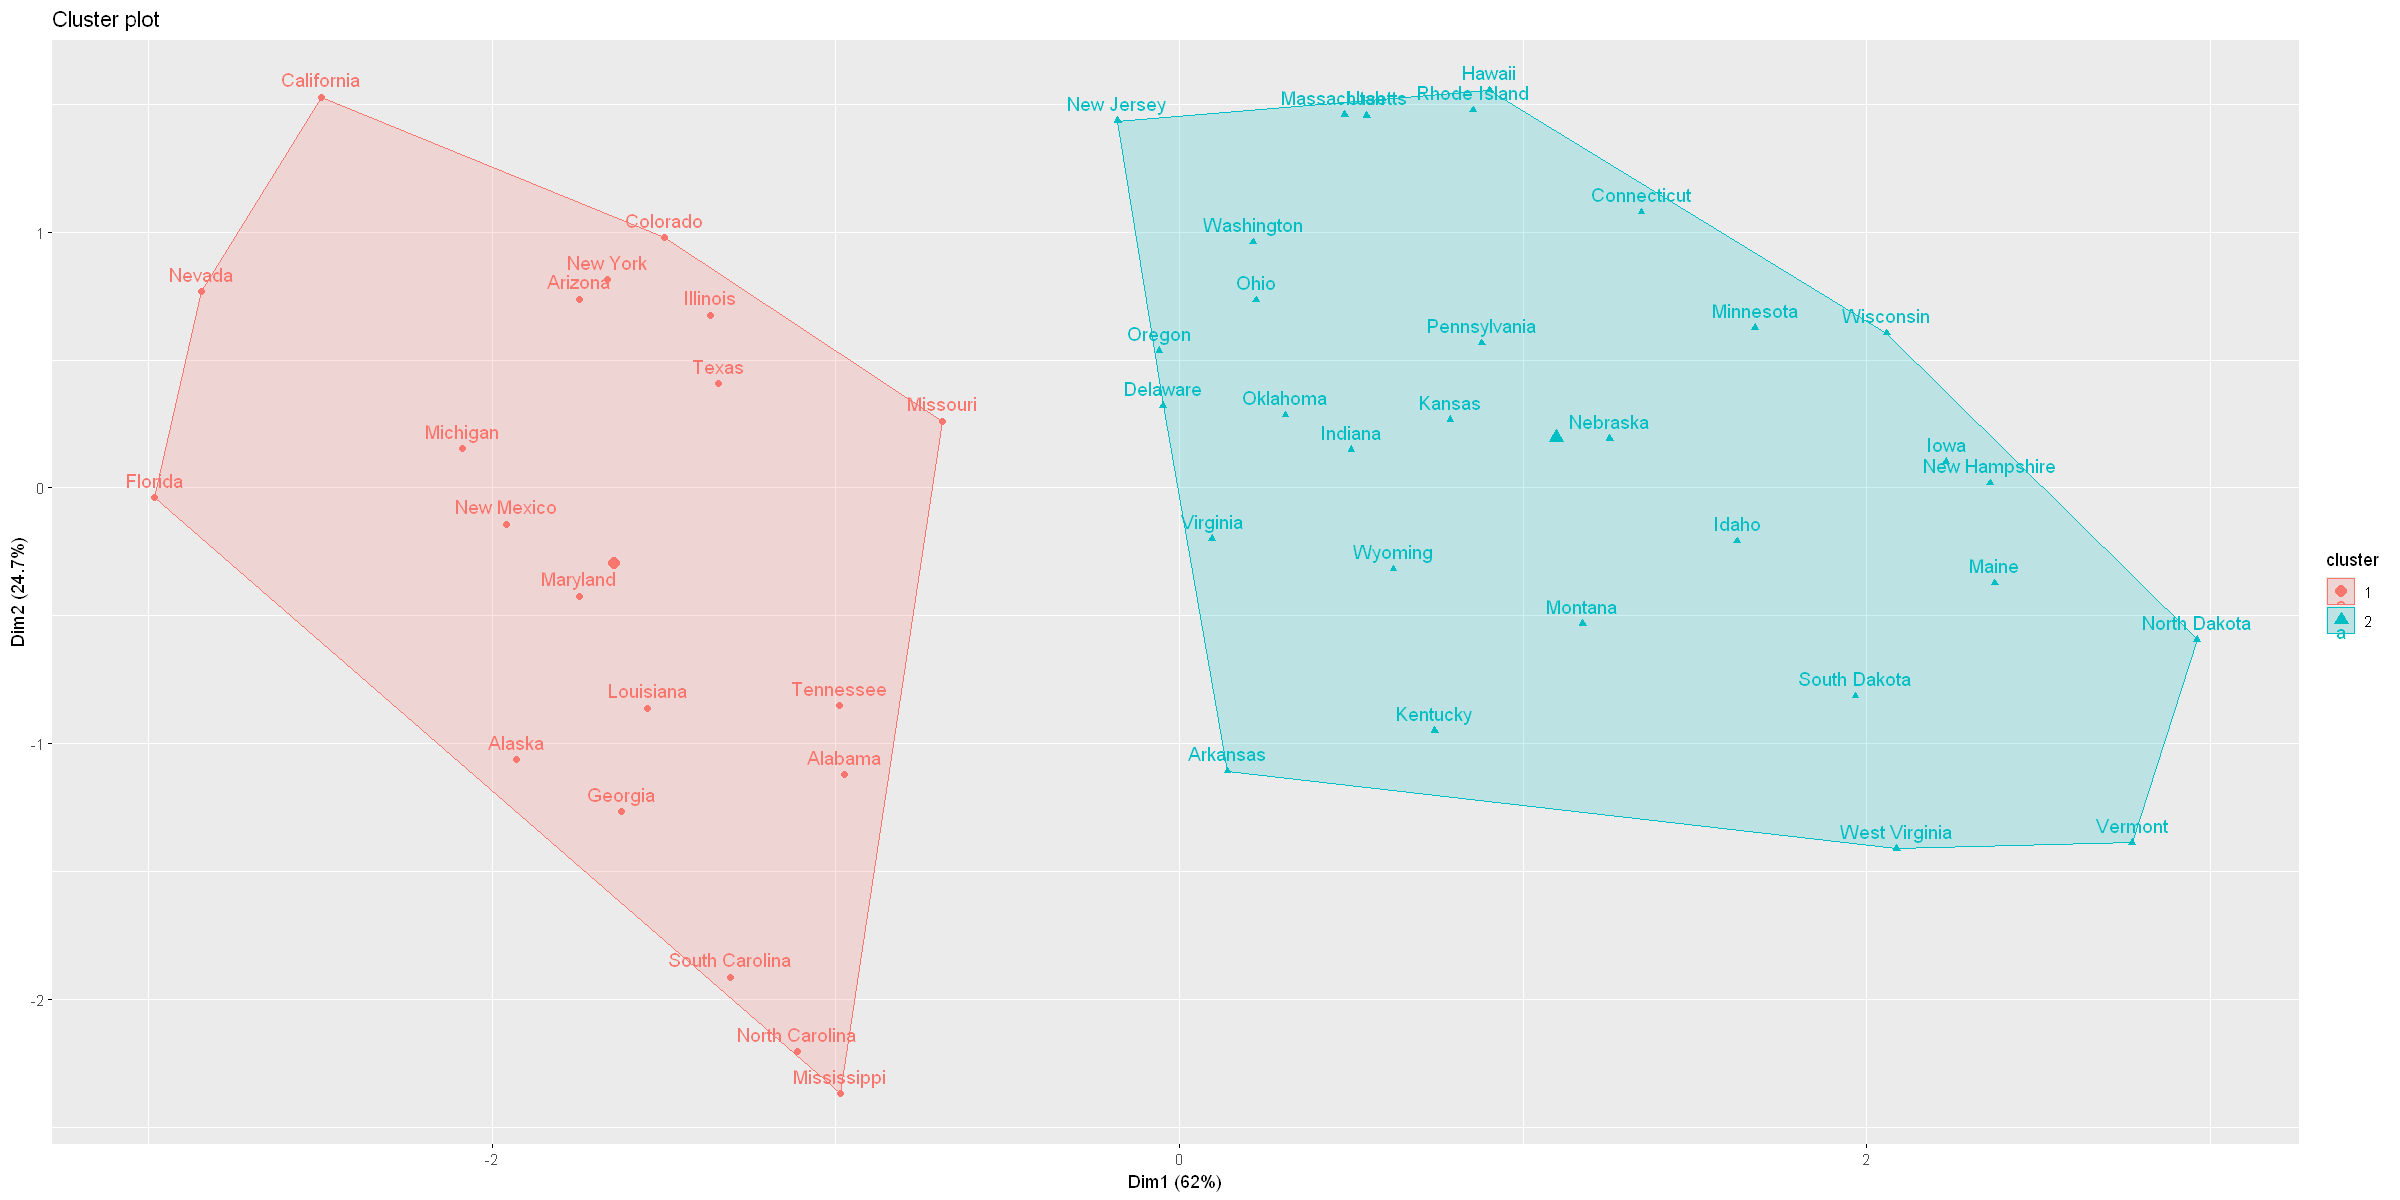

In [5]:
# 1.)
mat = scale(dat)
head(mat)

# 2.)
clustk = kmeans(mat[, c("Murder", "Assault", "UrbanPop", "Rape")], centers = 2, nstart = 25)

# 3.)
print(clustk$centers)
# The first cluster contains states with high values in Murder, Assault, and Rape.
# The second cluster contains states with low values in Murder, Assault, and Rape.

# 4.)
fviz_cluster(clustk, data = mat)
# The clustering appears to separate states with low vs high values of Dim1.
# Based on the cluster means from above as well as outside analysis of the states we can determine that Dim2 correlates closely
# with population density or UrbanPop and Dim1 would correlate closely with crime rates or Murder, Assault, and Rape.
# In general, the clustering separates the states into low vs high crime rate.


<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Use the code from lecture to plot an elbow plot to select the optimal number of clusters. Plots clusters from K = 1 to K = 20.

2. Which number of clusters K is the optimal number of clusters, in your opinion. Why?

3. Cluster the data using the number of clusters you selected in Task 2.2.

4. Print the cluster centers/means and plot the clusters using `fviz_cluster()`. Interpret how the states are clustered in complete sentences using cluster means and the plot.






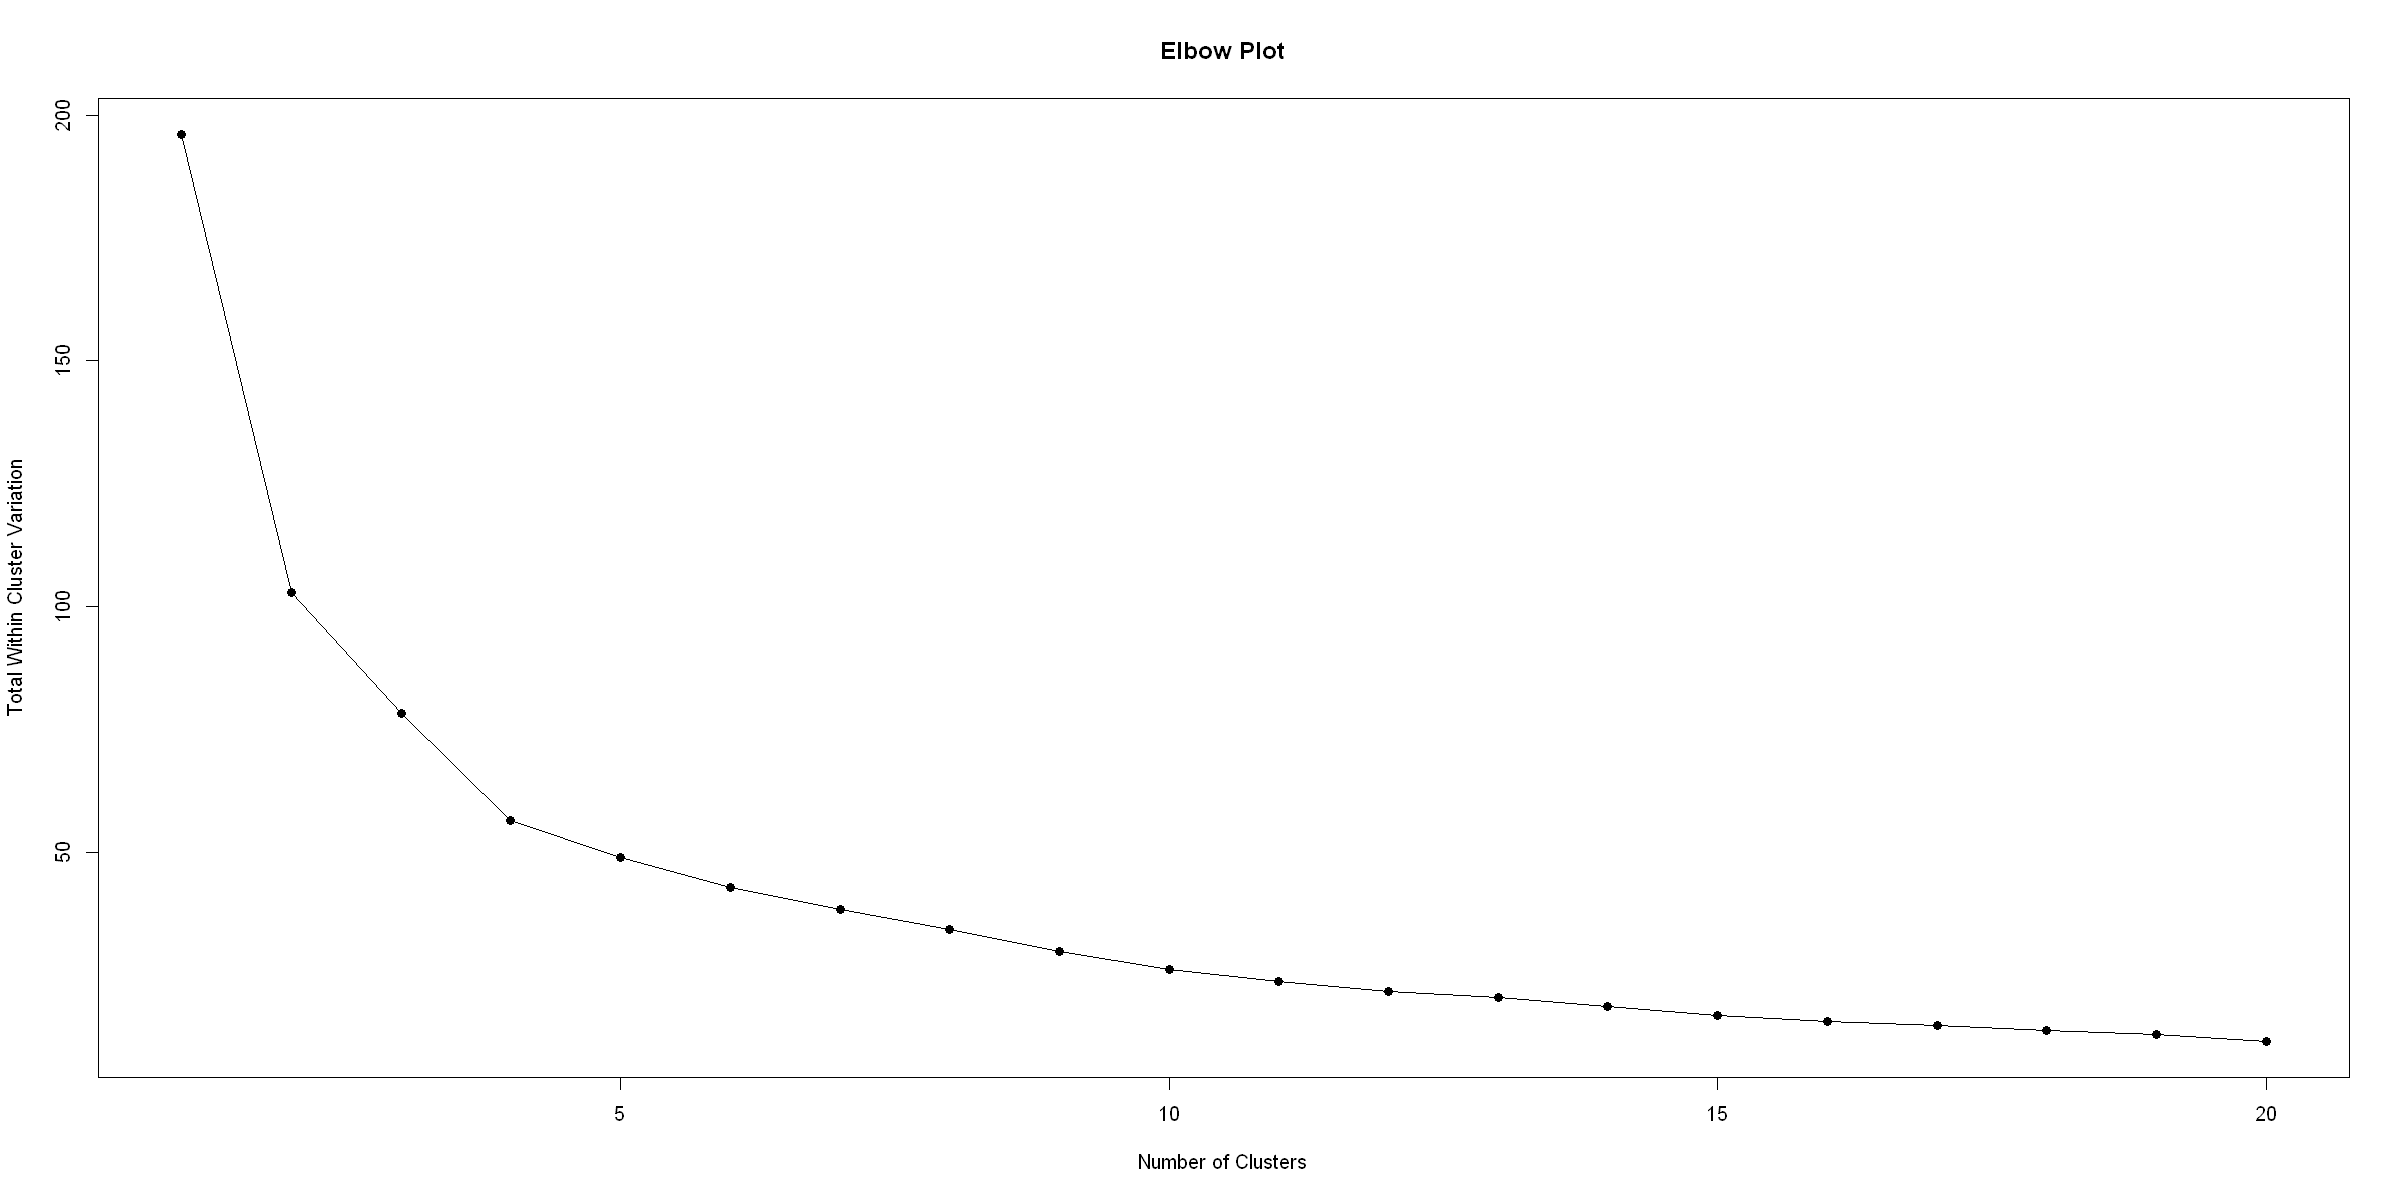

In [6]:
# 1.)
within_var <- c()

# loop through numbers of clusters
for (nb_clust in 1:20) {

  # run kmeans
  clust <- kmeans(mat[, c("Murder", "Assault", "UrbanPop", "Rape")],
                  centers = nb_clust,
                  nstart = 25)

  # store total within cluster variation
  within_var <- c(within_var, clust$tot.withinss)
}

plot(1:20, within_var, type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "Total Within Cluster Variation",
     main = "Elbow Plot")

# 2.)
# It appears that k = 4, is the optimal number of clusters because it the last large decrease in total within cluster variation.

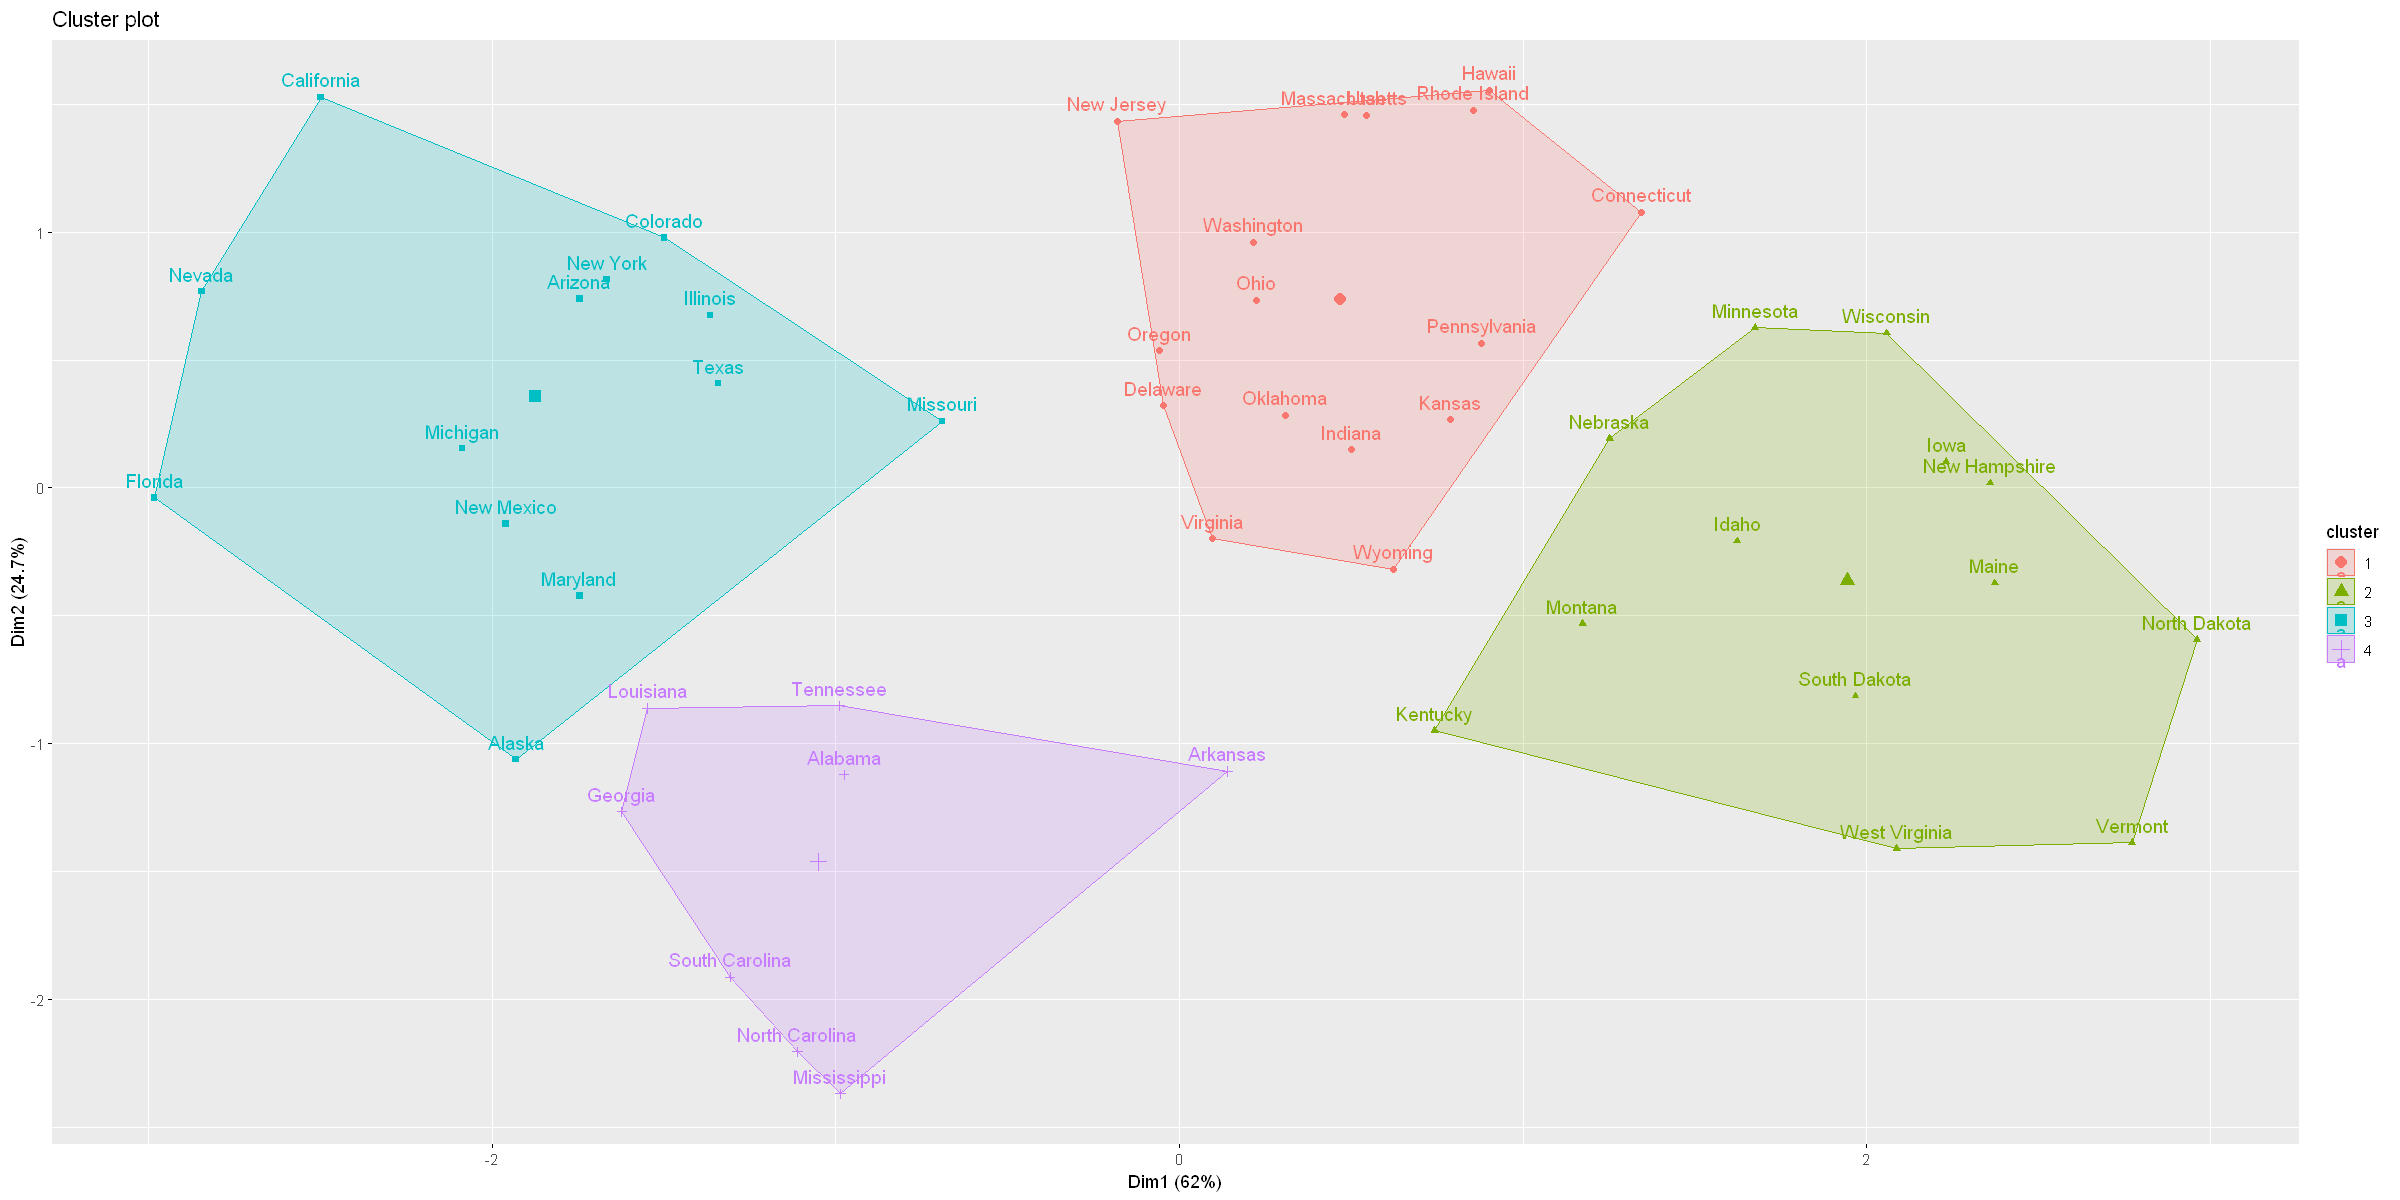

In [7]:
# 3.)
clustk = kmeans(mat[, c("Murder", "Assault", "UrbanPop", "Rape")], centers = 4, nstart = 25)

# 4.)
fviz_cluster(clustk, data = mat)

<br>

---

<br>






####<font color=red>Task 3</font>  (8 points)

1. Using the scaled data `mat`, cluster the states using hierarchical clustering and store as `clusth`. Remember to use `dist()` first.

2. Plot the dendrogram for the hierarchical clustering in `clusth`.

3. Plot the elbow plot for `clusth` using the heights stored in `clusth` (code in lecture). What is the optimal number of clusters, in your opinion? Explain.

4. Use the `rect.hclust()` function to visualize the clustering for the number of clusters you selected. Which states tend to be clustered together?






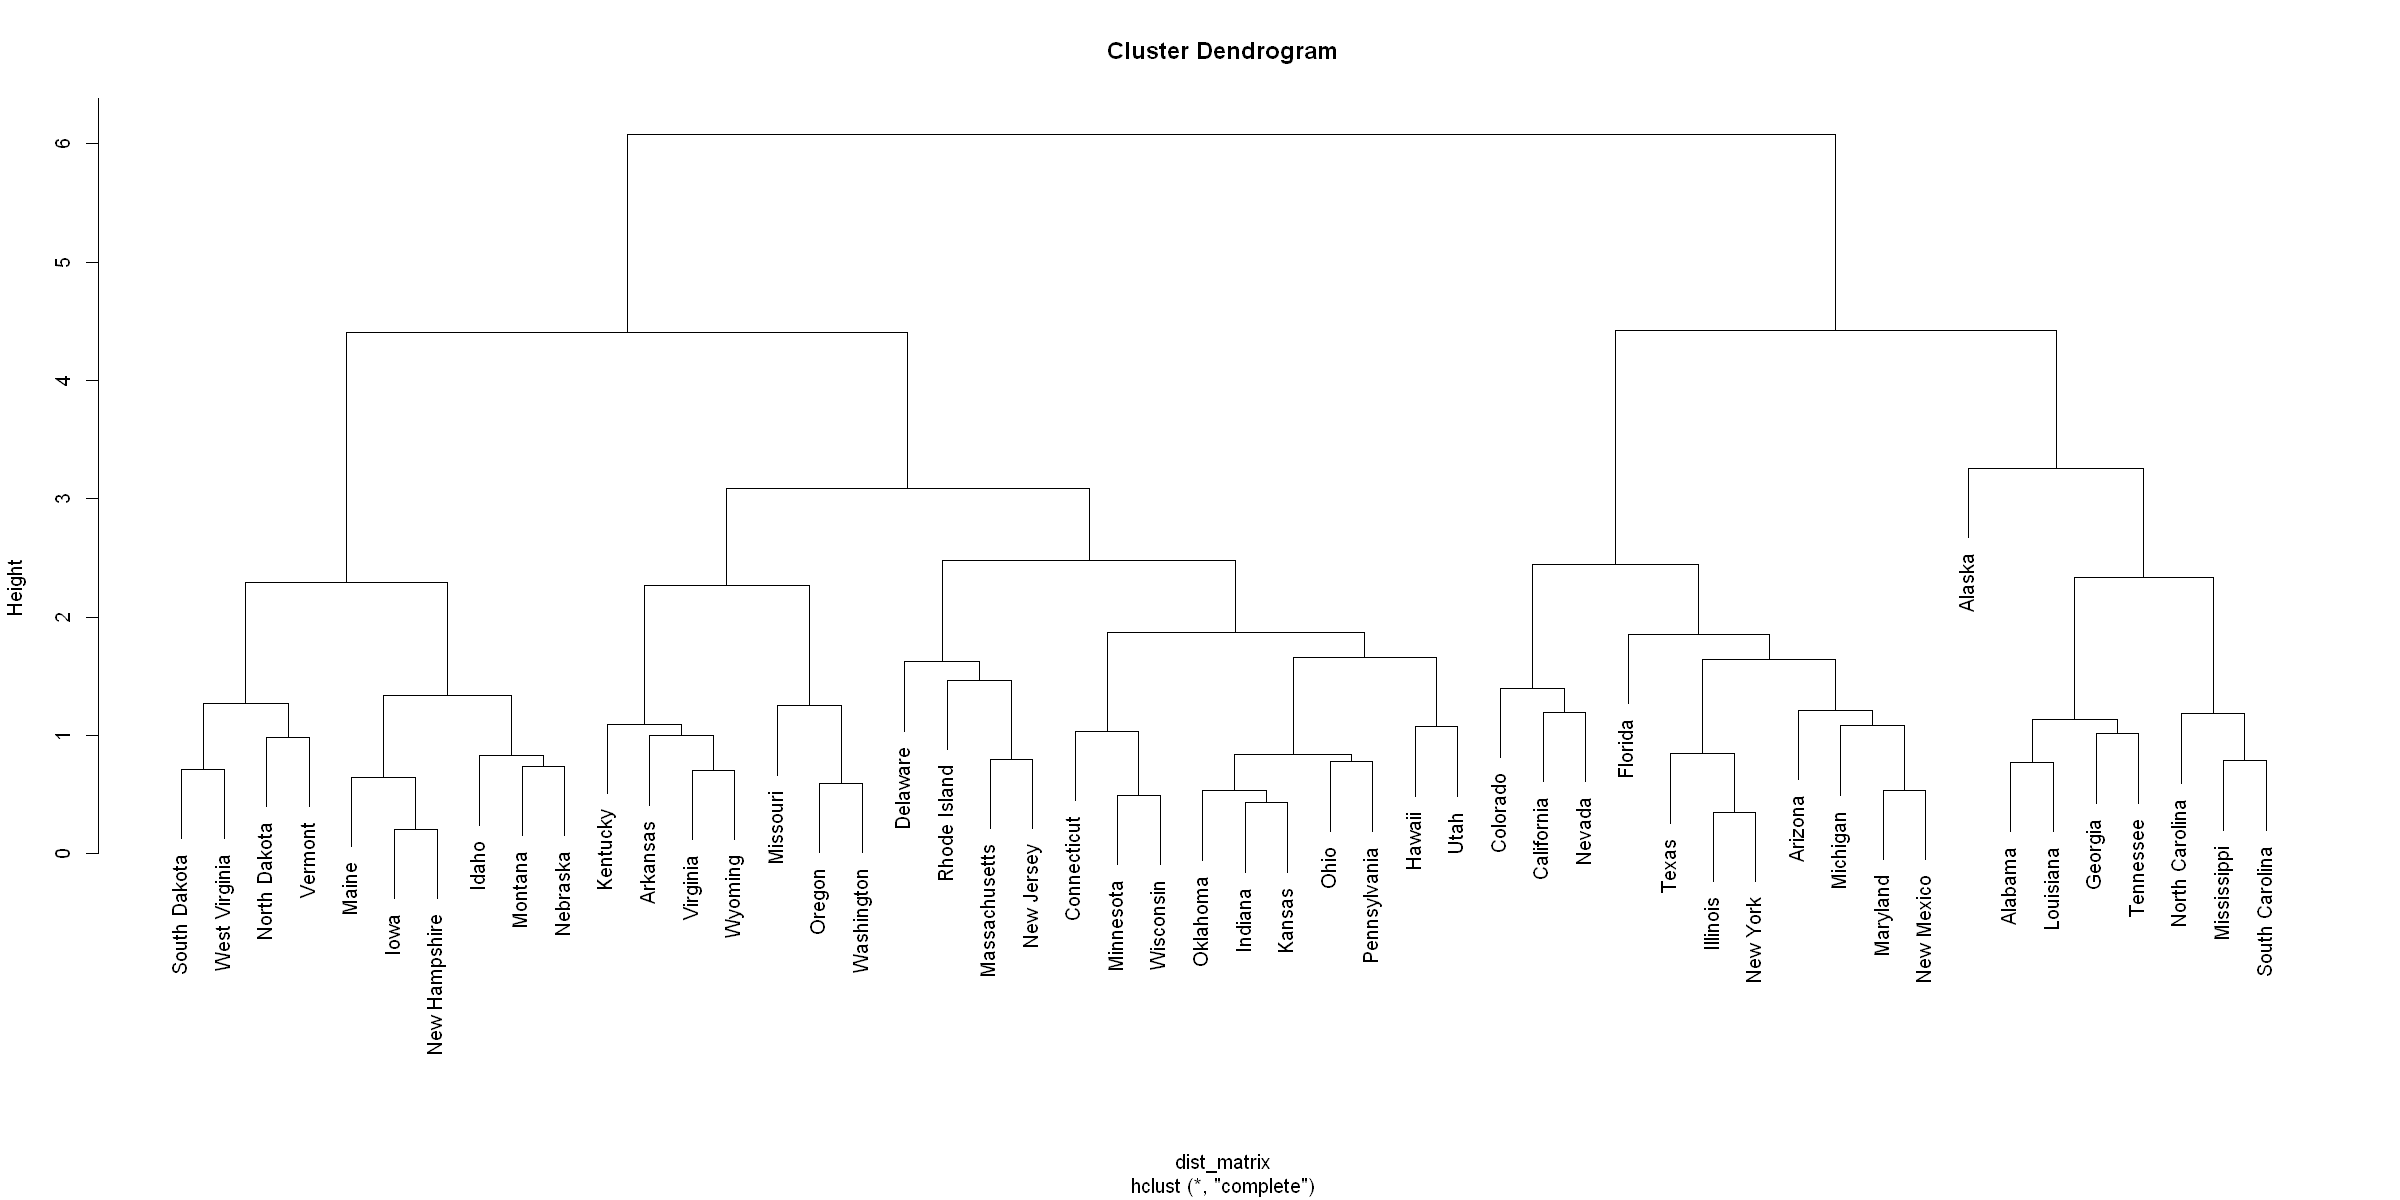

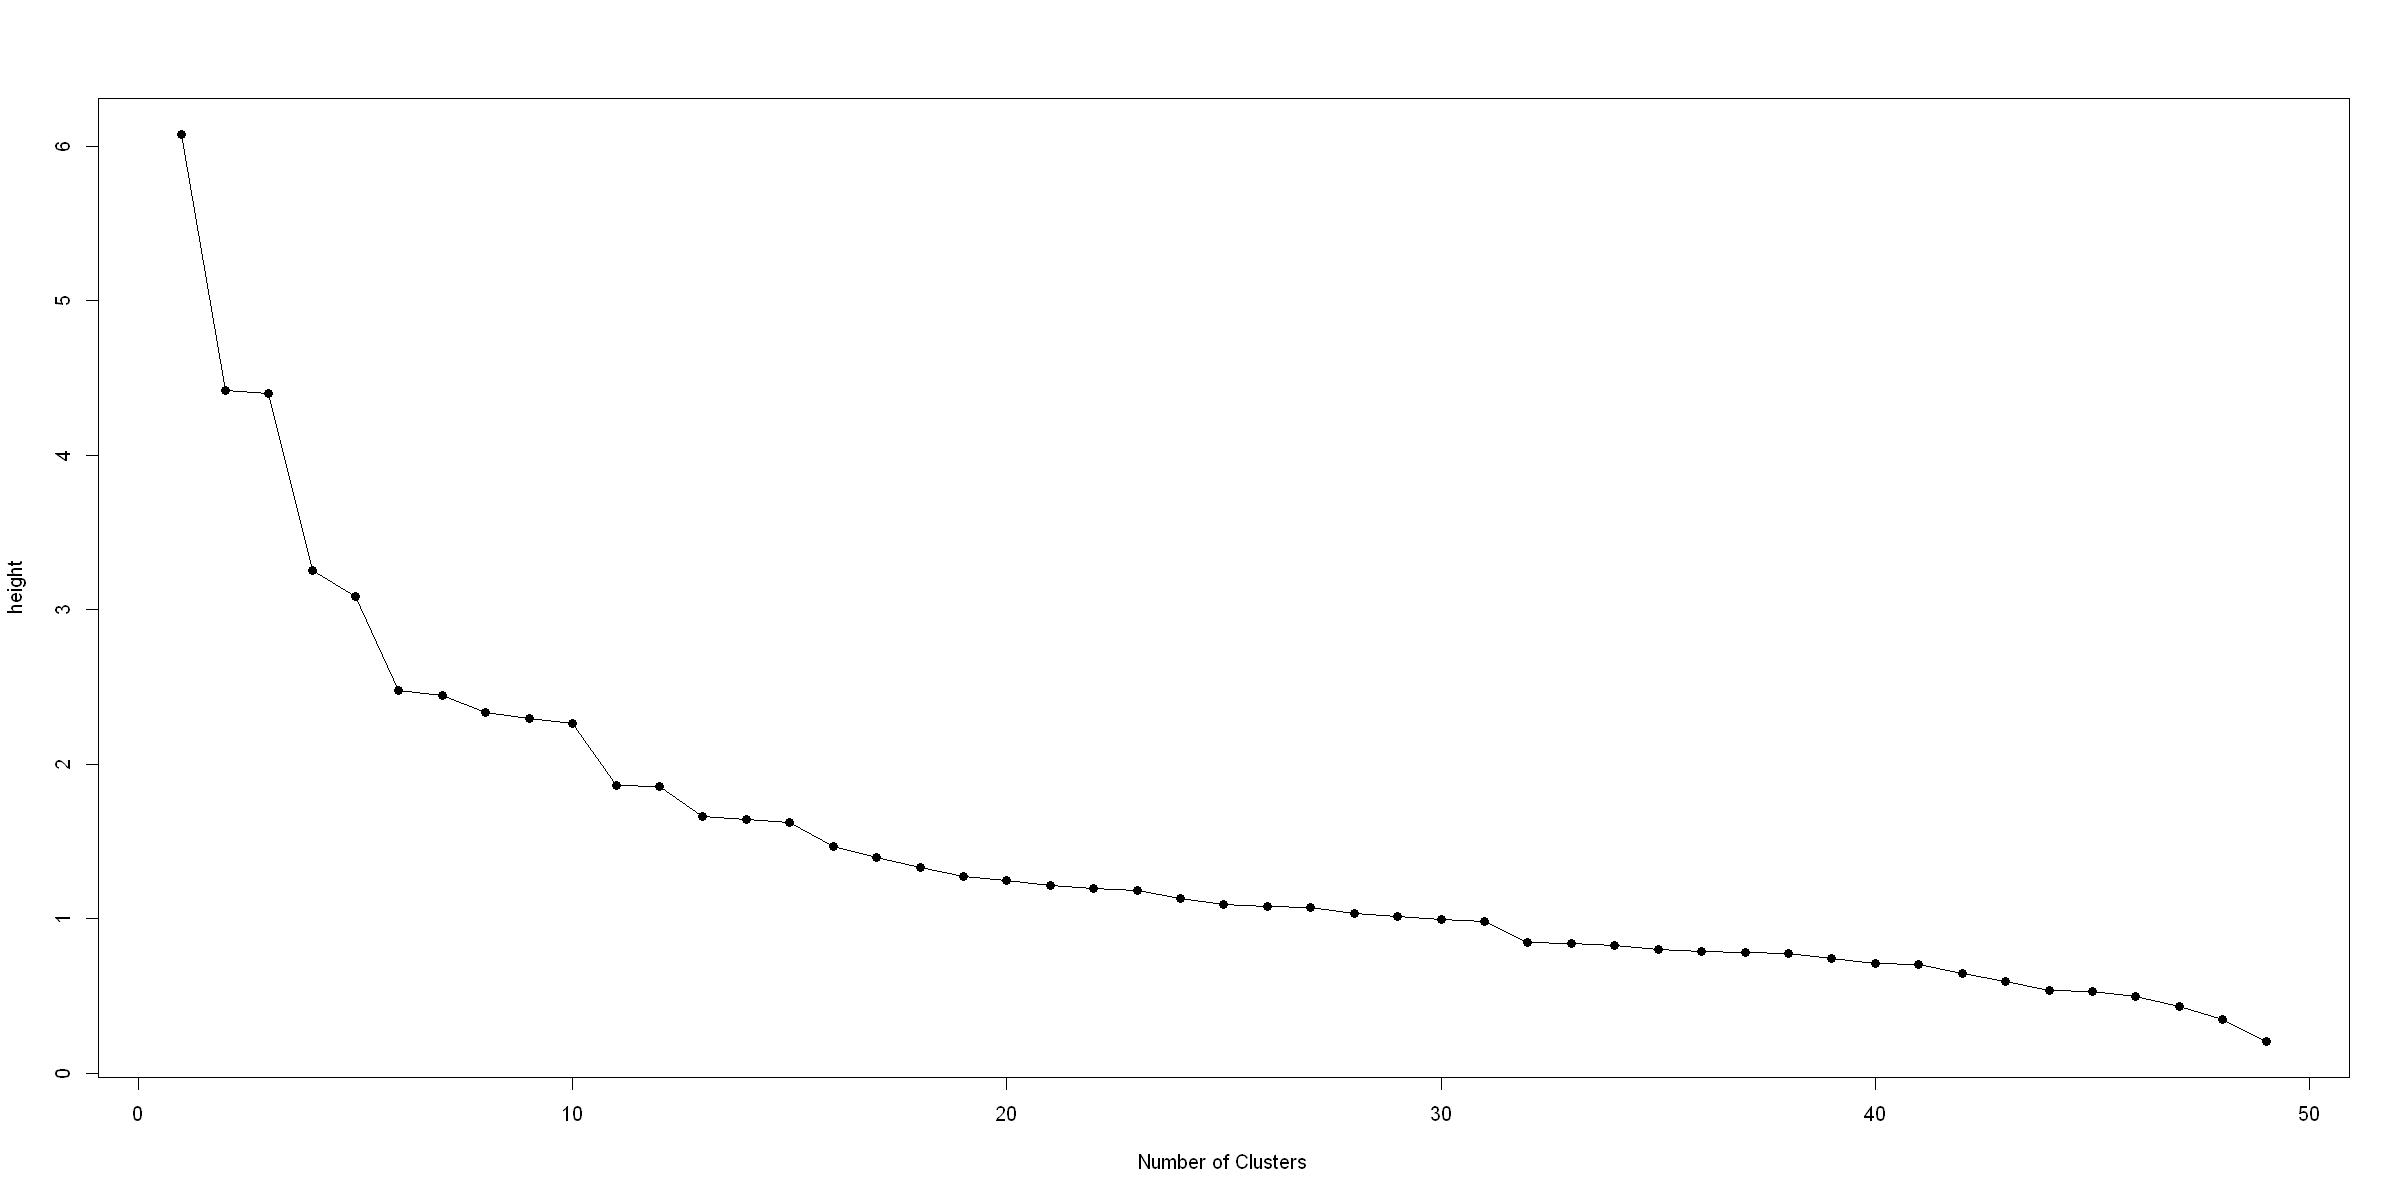

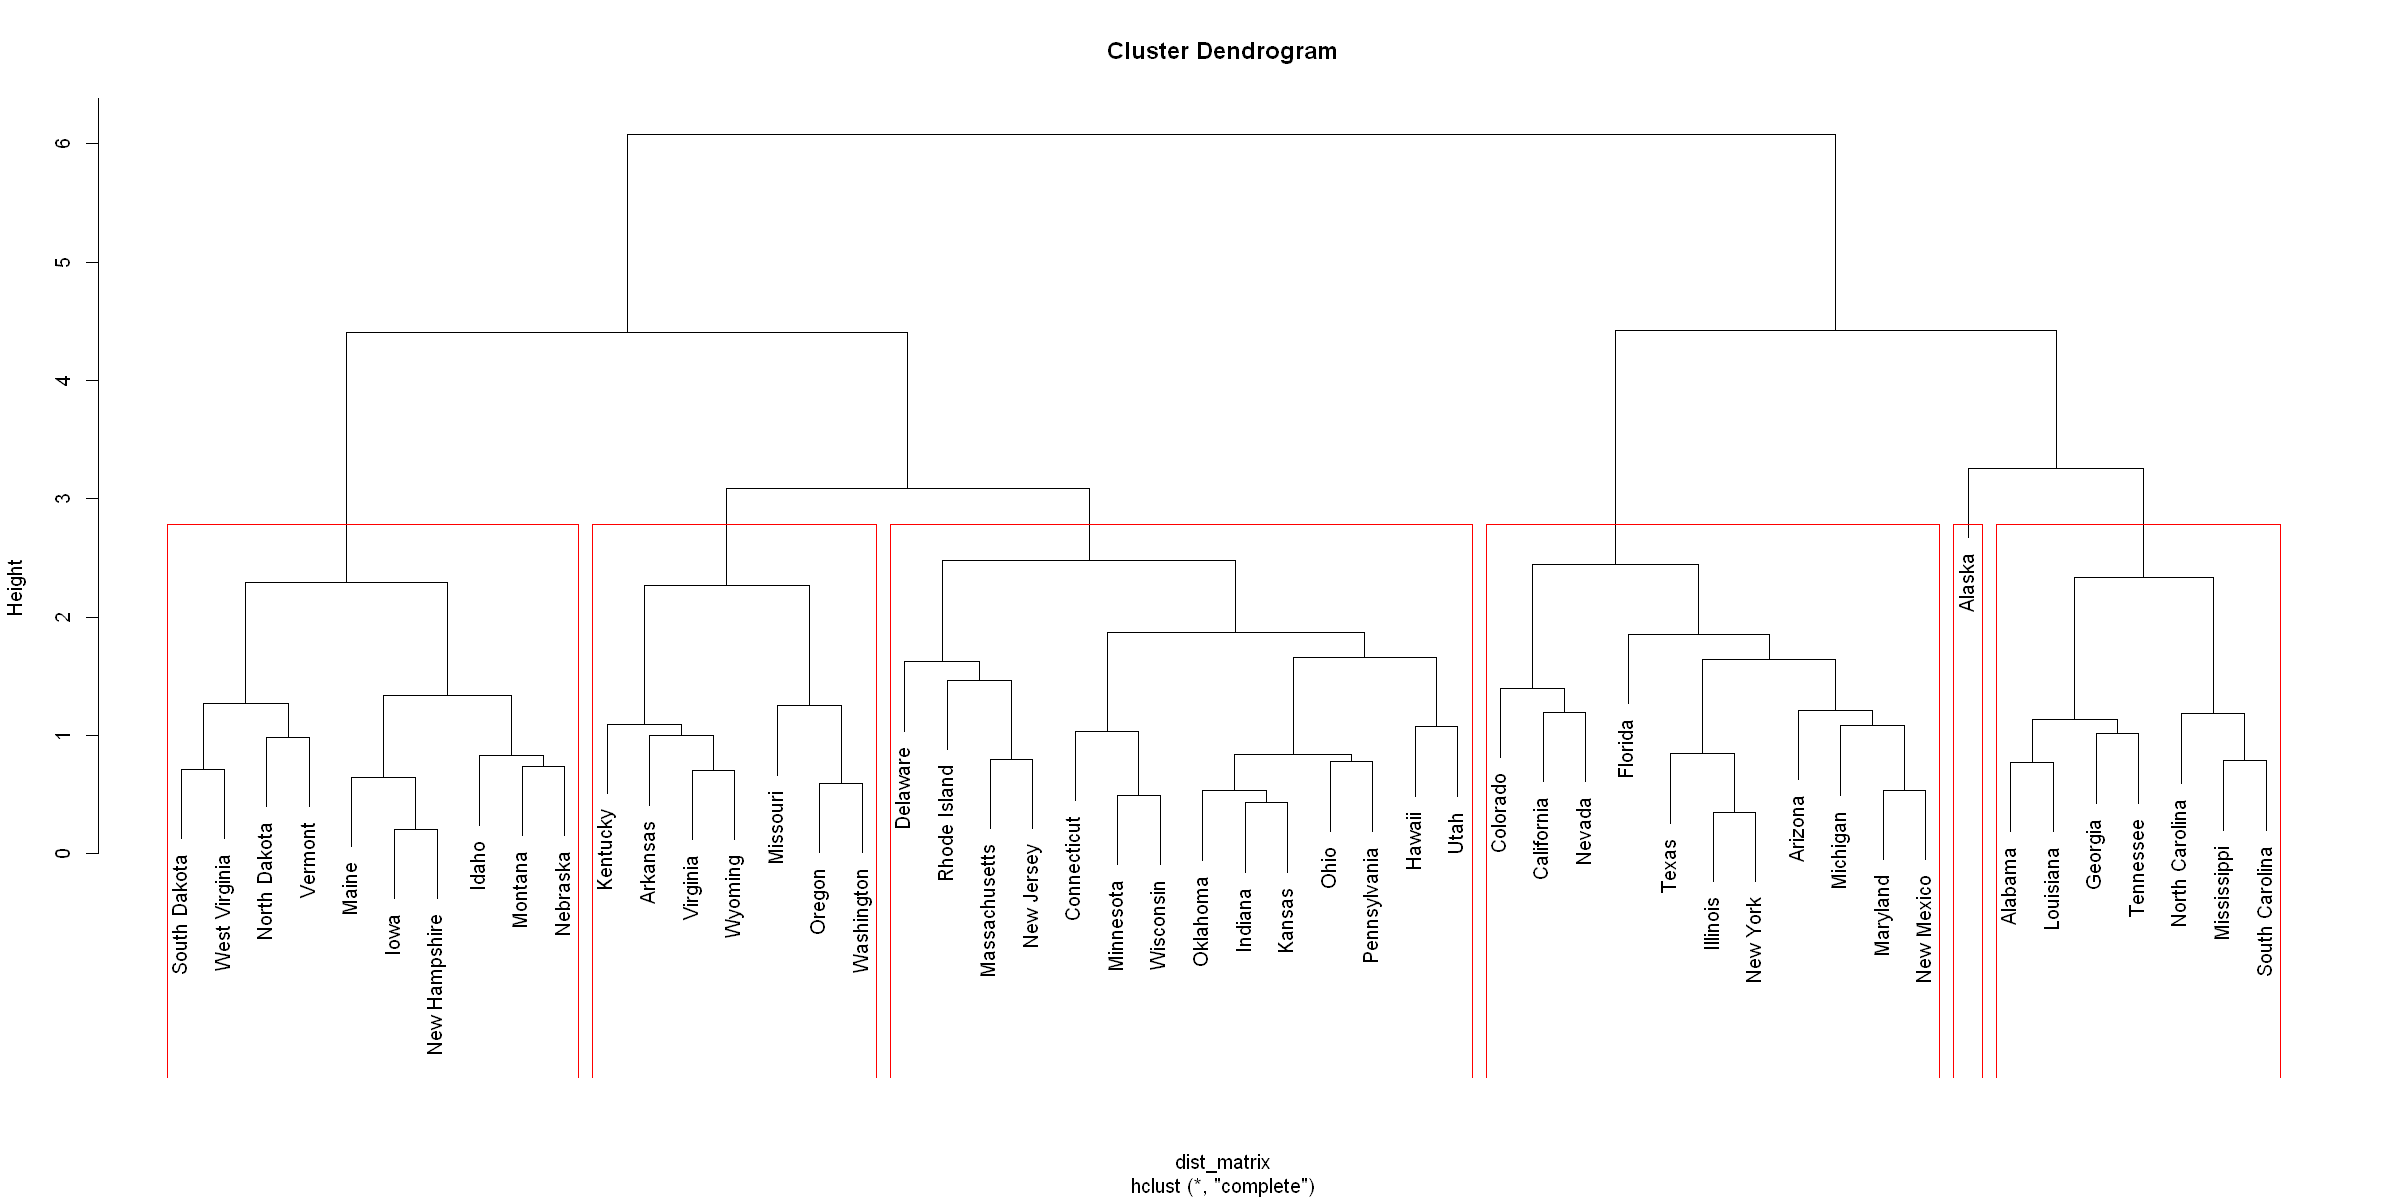

In [8]:
# 1.)
dist_matrix <- dist(mat[, c("Murder", "Assault", "UrbanPop", "Rape")])
clusth <- hclust(dist_matrix,
                method = "complete",  # default
                )

# 2.)
plot(clusth)

# 3.)
plot((nrow(dat) - 1):1, clusth$height,
     type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "height"
     )
# I would choose 6 clusters as the ideal value for k. This is because it optimizes the tradeoff between number of clusters and height of the dendrogram.

# 4.)
plot(clusth)
rect.hclust(clusth,
            k = 6, # k is used to specify the number of clusters
            border = "red")
# The states clustered together mostly by population density. The 1st left most cluster contains all extremely rural states. The 2nd and 3rd clusters contains all middle density states.
# The 4th cluster contains all population dense states like California, Florida, Texas, New York. The 5th contains Alaska which is uniquely alone in low population density.
# The last or right most cluster contains all states from the South.


<br>

---

<br>






####<font color=red>Task 4</font>  (1 points)

The code below also performs hierarchical clustering but with nice visualizations. Feel free to play around with the value K!

```
# Number of clusters
K = 2

# Hierarchical clustering
hc.cut <- hcut(mat, k = K, hc_method = "complete")

# Visualize dendrogram
fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)

# Visualize cluster
fviz_cluster(hc.cut, ellipse.type = "convex")
```








Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


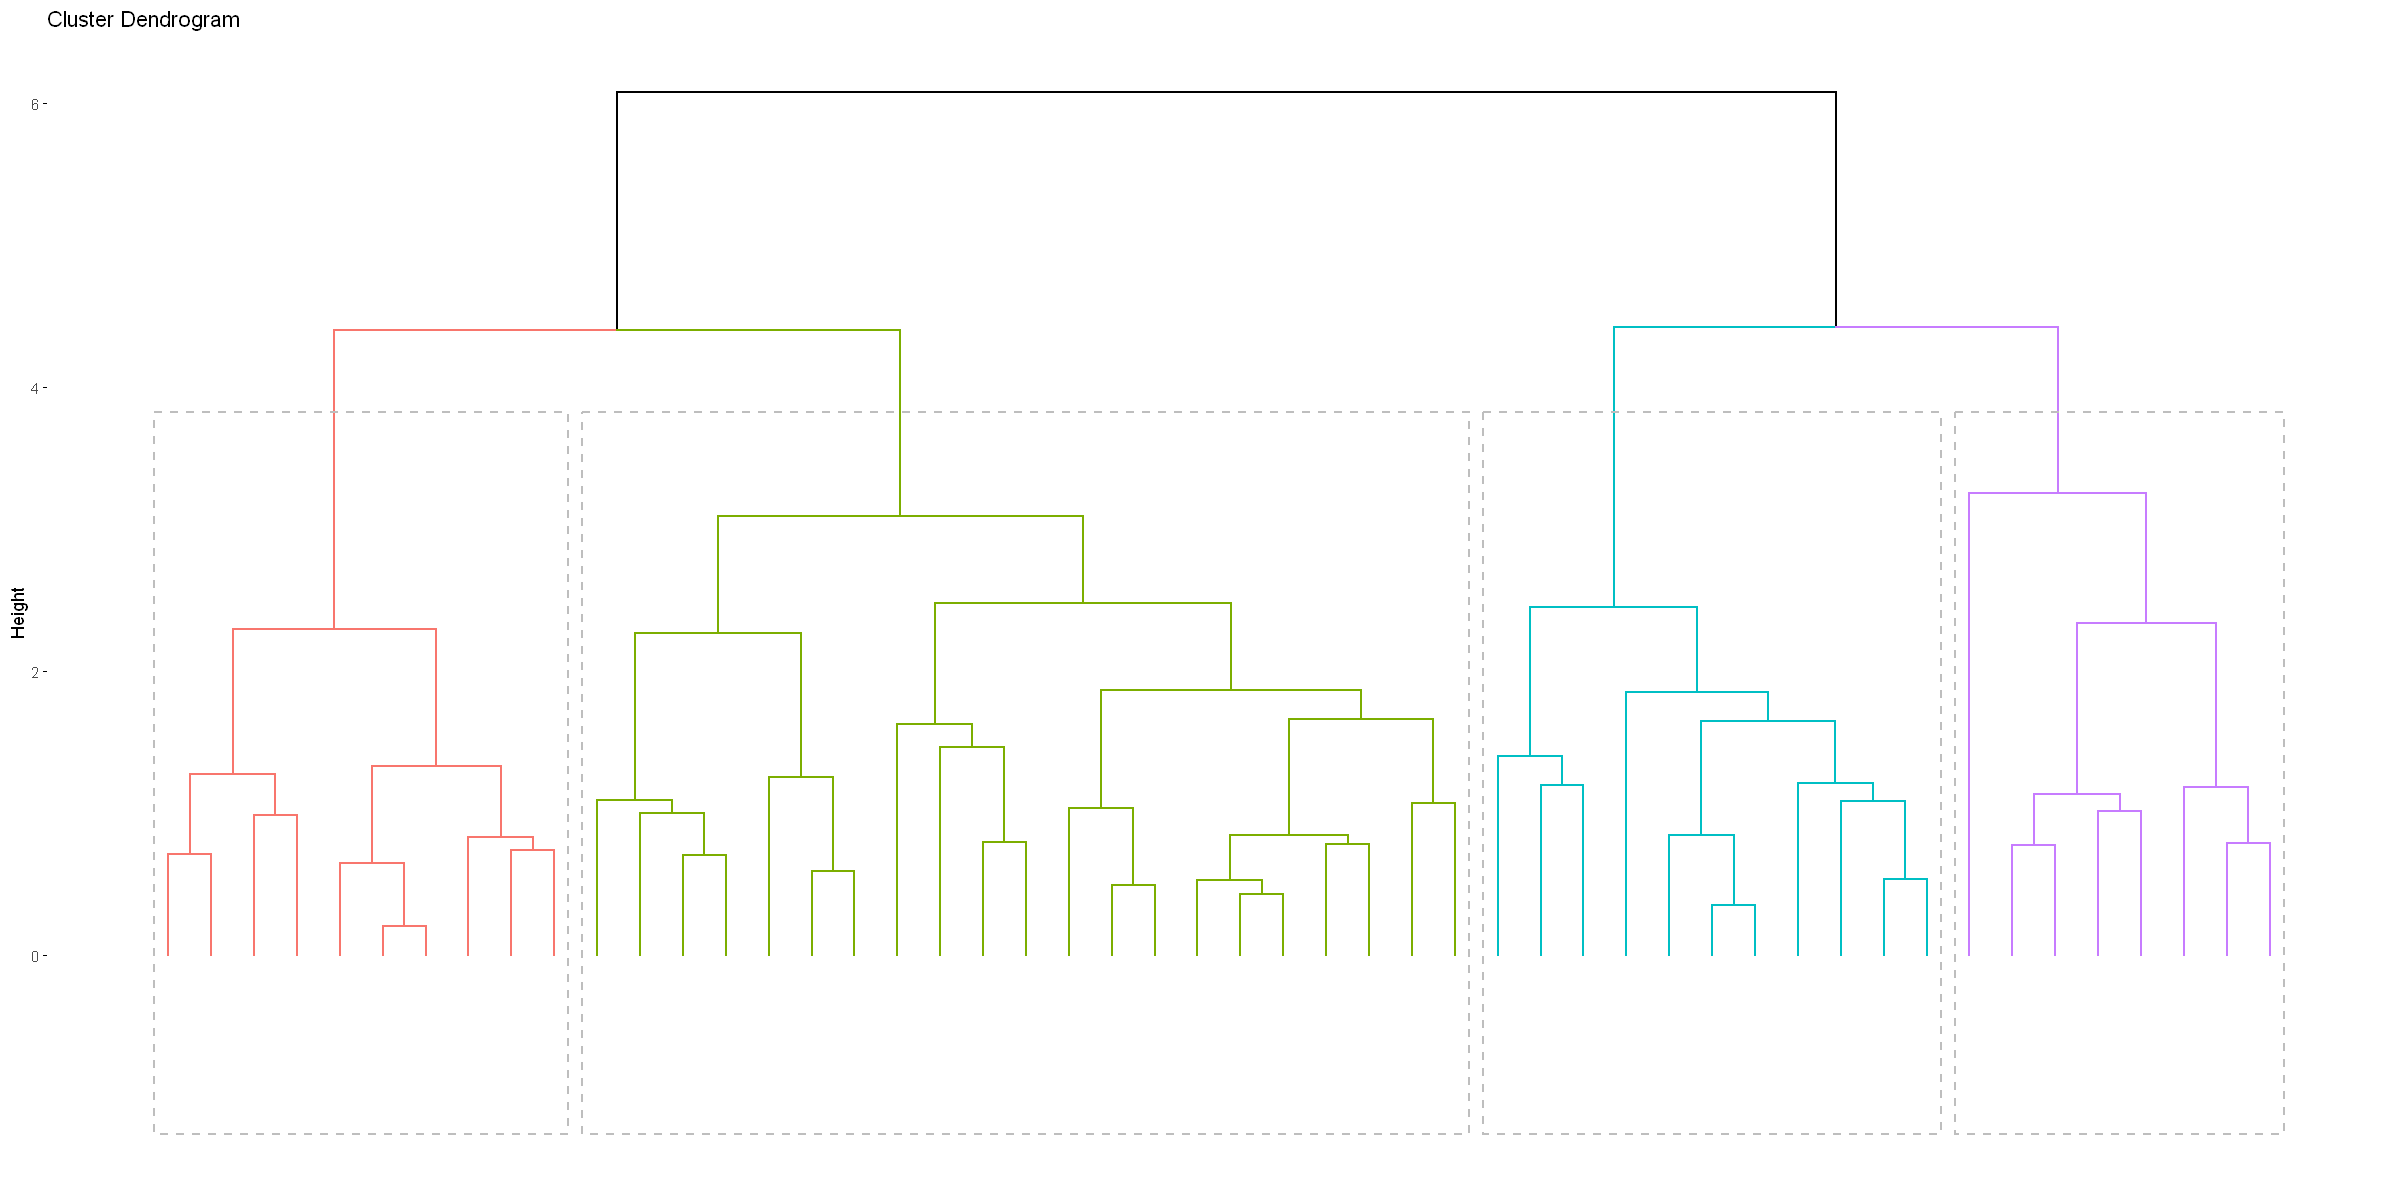

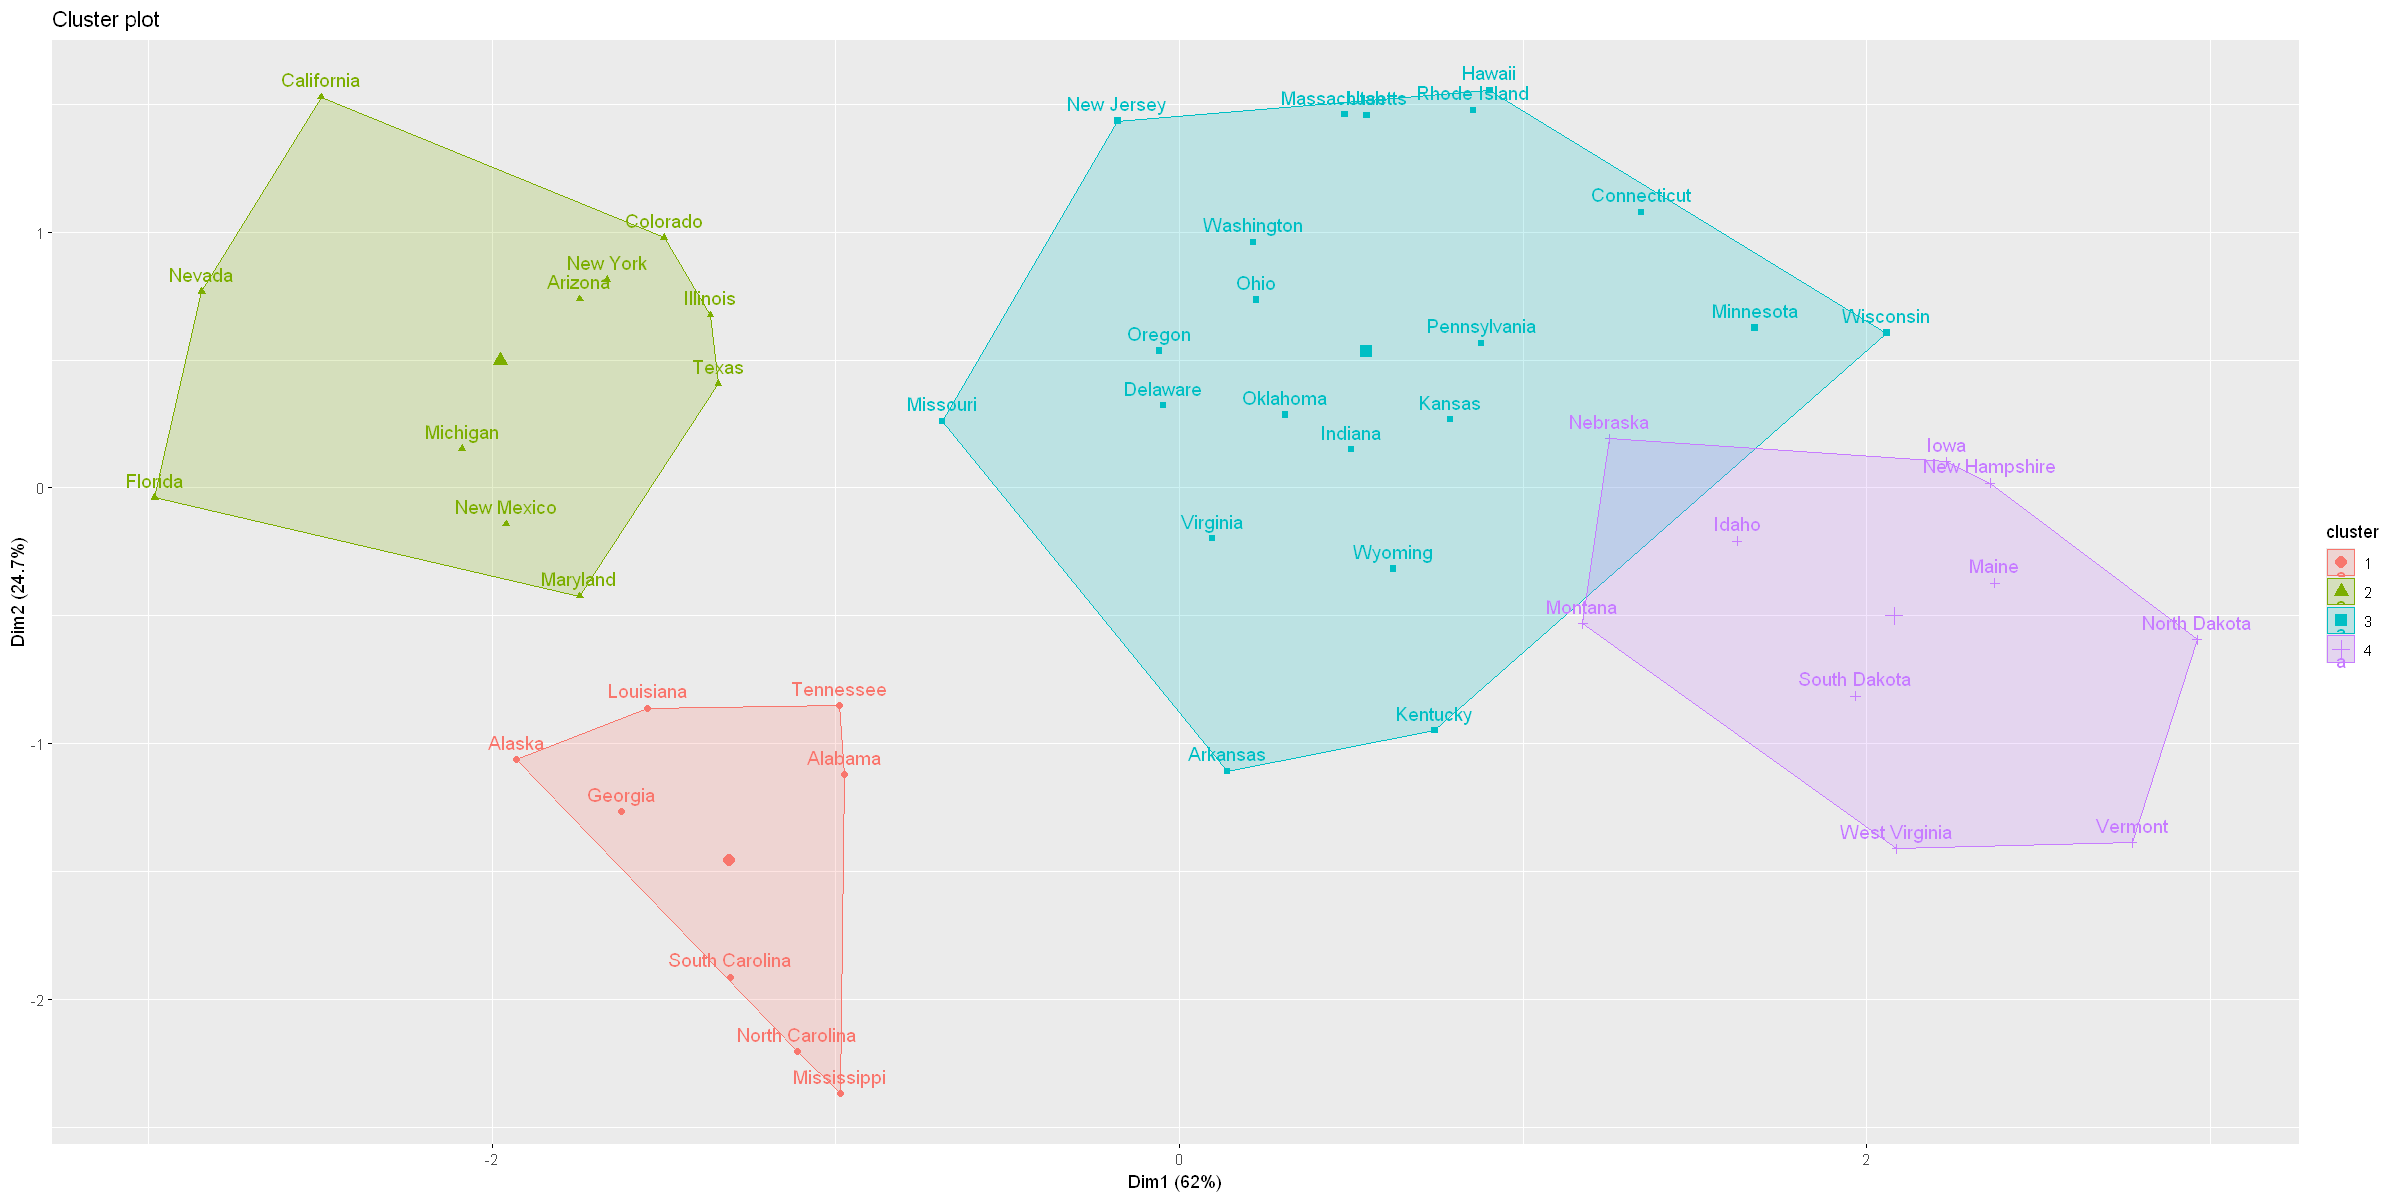

In [9]:
# Number of clusters
K = 4

# Hierarchical clustering
hc.cut <- hcut(mat, k = K, hc_method = "complete")

# Visualize dendrogram
fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)

# Visualize cluster
fviz_cluster(hc.cut, ellipse.type = "convex")